# Welcome to Milestone 02
***
###### Created by Maysey Lu

## Task 01: Introduction to Markdown 

Hello! This is my Python notebook demonstrating my knowledge in using Markdown to change a plain document into something nice and aesthetically pleasing to the eyes!

Let's start off with my heading. Notice how it's bolded and in larger font? To do that is simple:
> To **bold** text, simply use `**insert-text-here**` or `__insert-text-here__`  
> To increase font size, use `#` before your text  

⚠️ Be wary of the number of asterisks ( * ), underscores ( _ ), and octothorpes ( # ) you use as increasing or decreasing the number will change its function.

To follow up on my warning message above, this is what I meant:
> Surrounding the text with one asterisk or underscore on either side will *italize* the text  
> Using three asterisks or underscore on either side will ***bold AND italize*** the text

When using octothorpes,
>* use **one** for titles
>* use **two** for headings
>* use **three** for subheadings  

The more #'s you use, the smaller the heading gets - but it is still much larger than regular text\!  
**Note:** This will also slightly bold your text - in my heading, I used a mix of octothorpes and asterisks

For quoted text or blockquotes (or I use it here for emphasis/variety), add a `>` before your text.  
For a quote within a quote, use `>>` before your text.

Something I've noticed in Markdown that is kind of annoying is that specific special characters will trigger Markdown formatting!

| Character Name | Symbol | Character Name | Symbol | Character Name | Symbol | Character Name | Symbol |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Backslash | \\ | Backtick | \` | Asterisk | \* | Underscore | \_ |
| Curly Braces | \{} | Square Brackets | \[]| Parentheses | \() | Octothorpe | \# |
| Plus Sign | \+ | Hyphen | \- | Period | \. | Exclamation Mark | \! |

To avoid that, use `\` before the special character to let Markdown know you're not trying to format, but want the literal character.

Did you know that you can also make tables in Markdown? To do so, use a mix of hyphens ( - ) and pipelines ( | ).  
> Use a minimum of three hyphens to create a visible horizontal divider  
> Use pipelines on the sides and in-between columns

Here's an example: 

| Variable | Value |
| --- | --- |
| x   | 0   |
| y   | 0   |

And this is the format use to create it:   
```
                                                           | Variable | Value |
                                                           | --- | --- |
                                                           | x   | 0   |
                                                           | y   | 0   |
```

##### Conclusion 
Today I've shown you some of the things I can do in Markdown. Of course, there's a lot more out there that I do know but didn't show/explain on here such as numbered lists, hyperlinks, math symbols, etc. **but** hopefully I've shown you enough to make you think: "*Maysey knows her Markdown pretty well.*"

I would also like to point out that this isn't **all** that Markdown can do. There are definitely some limitations in what general Markdown (by using a few simple symbols) can do but with the help of other code (i.e. HTML or CSS), we can do even more! This includes things like changing the font colour, font style, font size, underlining, etc.

> (HTML) To colour text, use `<font color=insert_colour_here> insert_text_here </font>`   
> (HTML) To underline text, use `<u> insert_text_here </u>`   
> (CSS) To change the font, use `<span style="font-family:insert_font_name;"> insert_text_here </span>`  
> (CSS) To change the size, use `<span style="font-size:insert_size_here;"> insert_text_here </span>`

**BUT** we must be careful when using HTML and CSS tags because it's not always supported! For example, when you view this Python Notebook on Jupyter lab, the tag formatting works fine, but when viewed on GitHub, the tags do not work and just show up as plain text 😕

Well, this is the end of my Milestone 02. Until next time, ciao! 😄

## Task 03: Method Chaining and Python Programs

In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scripts import project_functions

df = project_functions.load_and_process('..\..\data\data_raw\*.csv')

## Task 04: Exploratory Data Analysis (EDA)

In [26]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from collections import Counter

#### Our Dataset at a Glance

In [6]:
#Understanding my variables
df.shape

(391332, 18)

The .shape function returns the number of columns and rows in the dataset. Here, we can see that we have 391 332 rows and 18 columns - which is A LOT of data!

In [7]:
df.columns

Index(['language', 'review', 'timestamp_created', 'timestamp_updated',
       'recommended', 'votes_up', 'votes_funny', 'steam_algorithm_score',
       'comment_count', 'received_for_free', 'written_during_early_access',
       'num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'playtime_at_review', 'last_played',
       'game_id'],
      dtype='object')

The .columns function returns all the column names in the dataset. This is useful to know when I want to filter or plot my data :)

In [8]:
df.describe()

,language,review,timestamp_created,timestamp_updated,recommended,votes_up,votes_funny,steam_algorithm_score,comment_count,received_for_free,written_during_early_access,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,game_id
count,391332,390325,391332,391332,391332,391332,391332,391332,391332,391332,391332,391332,391332,391332,391332,391256,391332,391332
unique,1,310922,388619,388414,2,550,364,29790,94,2,2,2294,361,84643,9528,65096,367712,15
top,english,good,1599758333,1599758333,True,0,0,0,0,False,False,4,1,579,0,181,1602030057,(Adventure) 252490_Rust
freq,391332,3877,5,5,354238,303572,356215,288322,378912,383279,373394,6557,105503,71,255269,274,23,75099


The .describe() function is useful to get a sense of what the dataset contains and helps with identifying potential issues with the data. Here, something useful for me to know is that all the reviews are in English, meaning I won't need to spend extra time writing code to filter out non-English reviews which was what I was planning to do initially. 

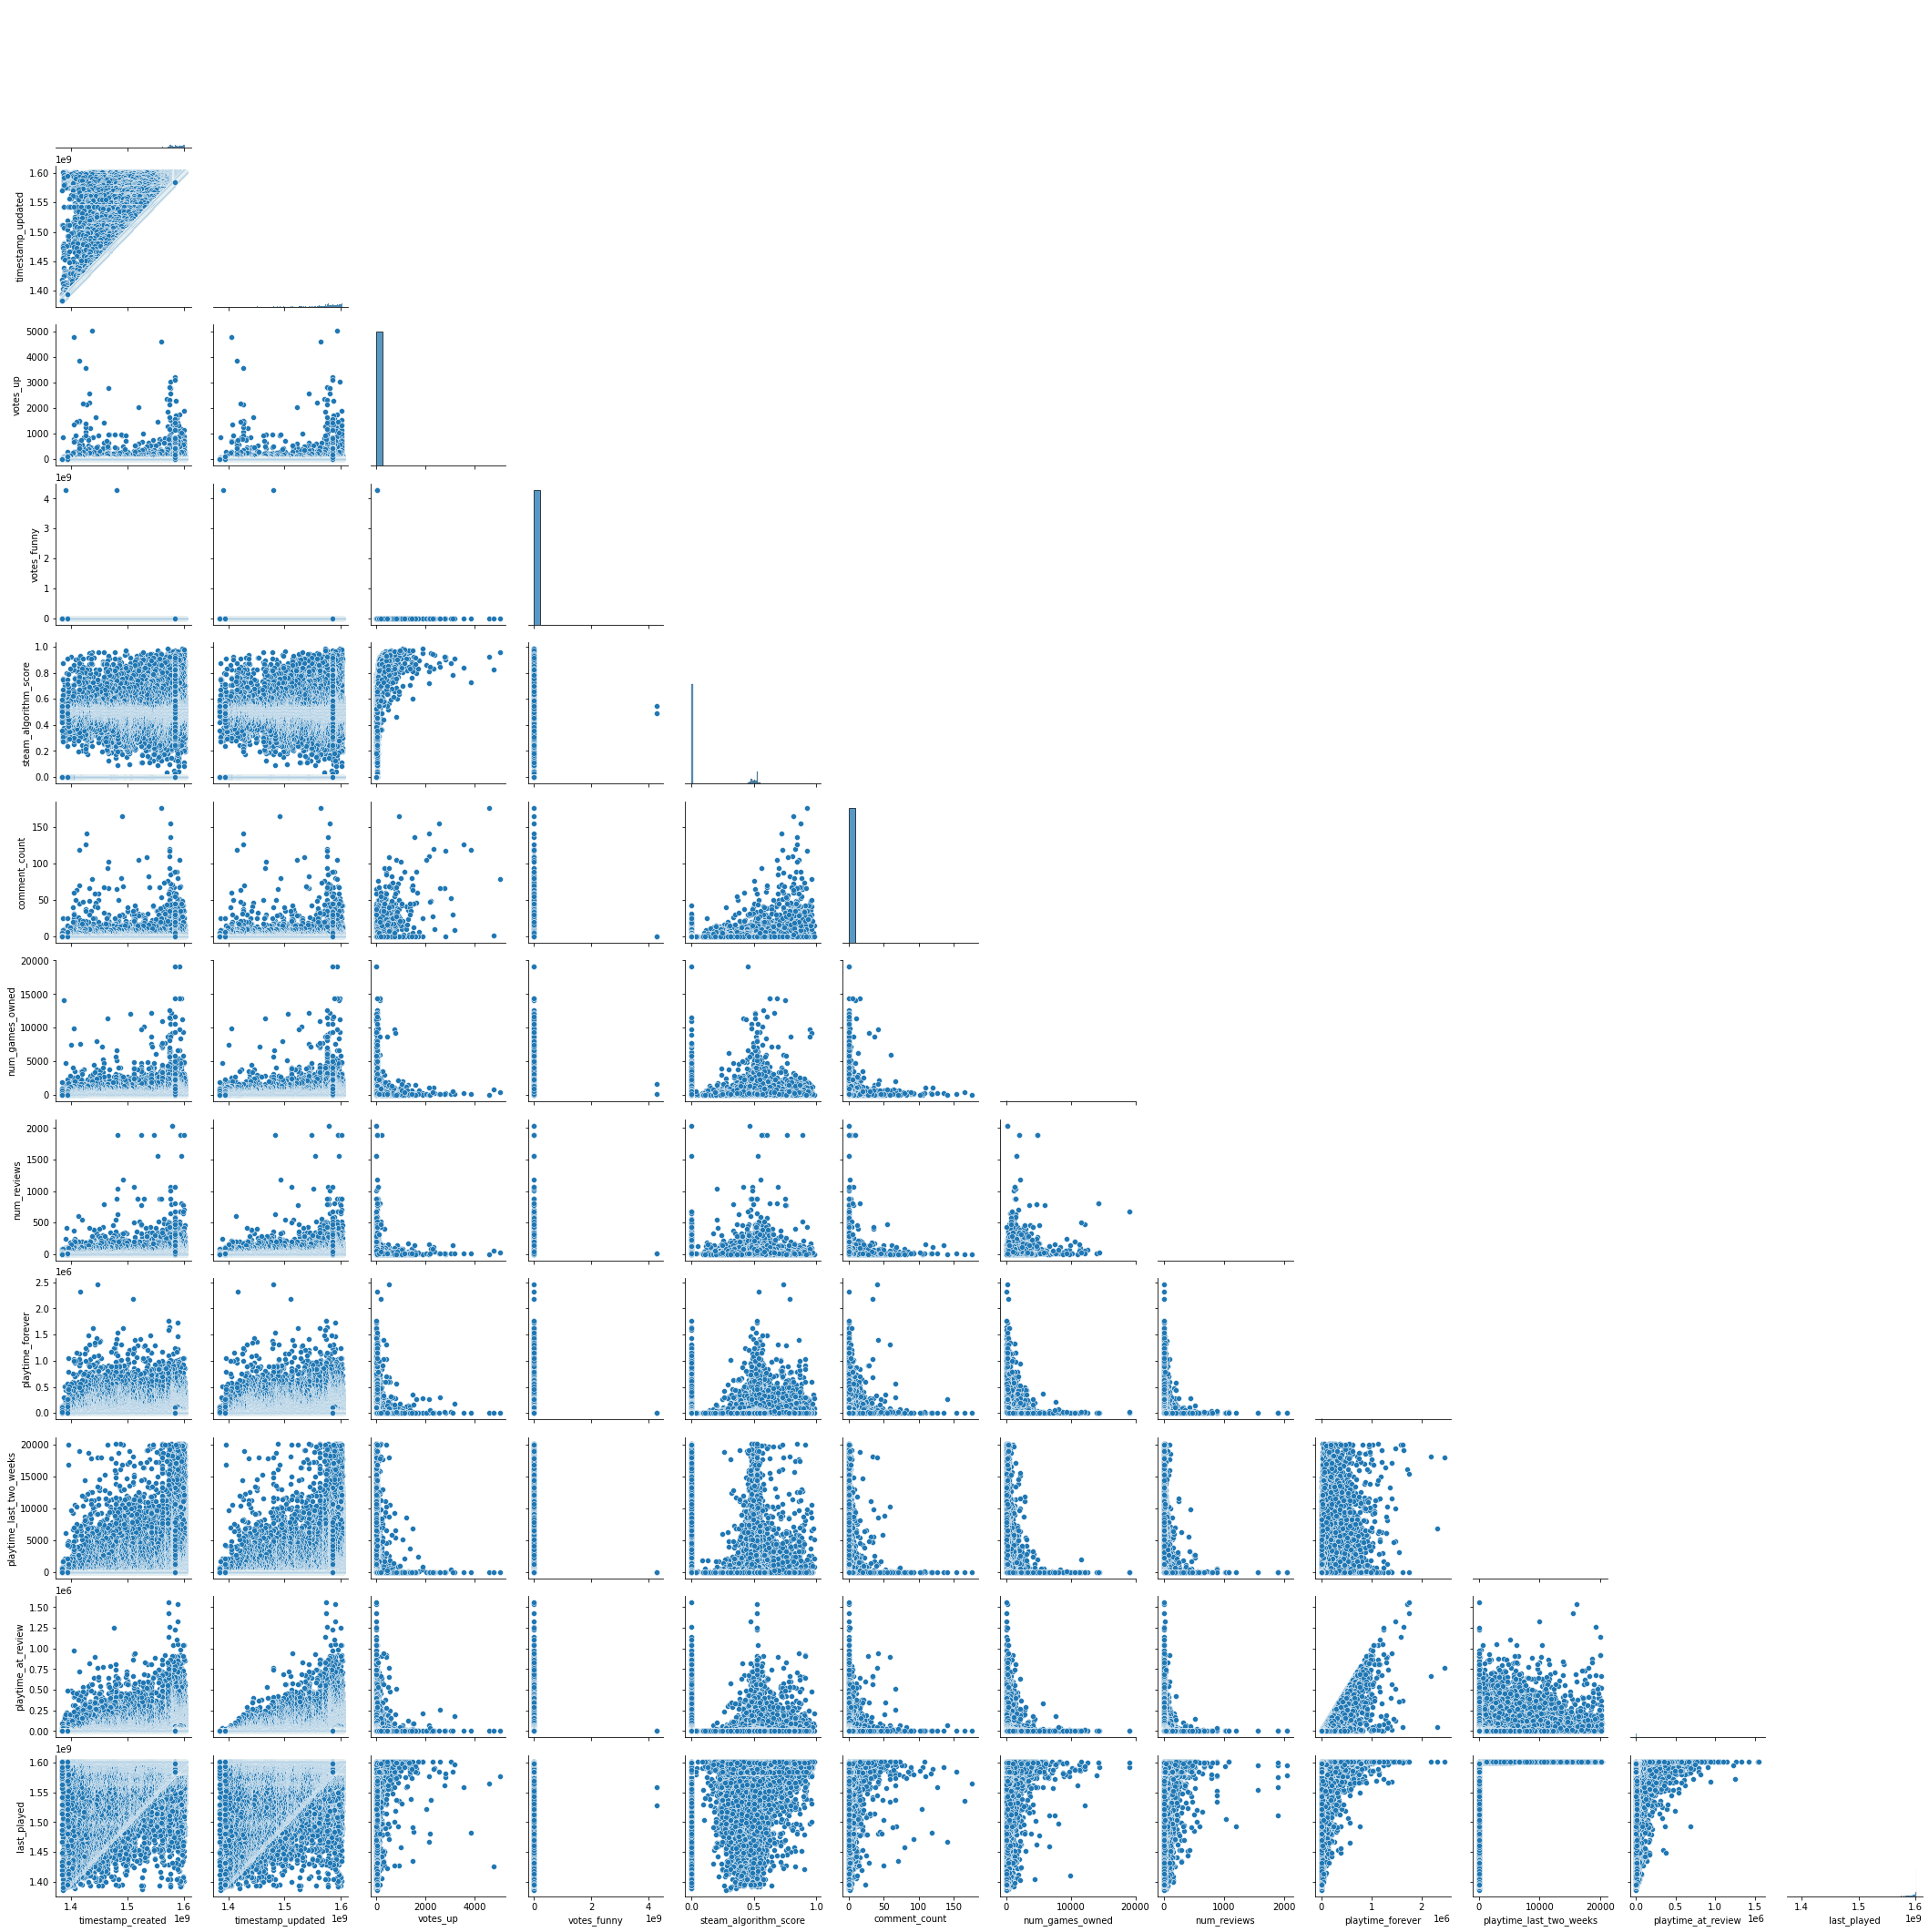

In [24]:
df_numeric = df.drop(['language', 'review', 'recommended', 'received_for_free', 'written_during_early_access', 'game_id'], axis=1).astype(float)
sns.pairplot(data=df_numeric.select_dtypes('number'), corner=True)

This set of plots show the relationship between each column with quantitative data. From afar, there doesn't seem to be any distinct correlations between columns; however, some things to make note of:

1. Reviews with a high Steam algorithm score generally have a high comment count and votes up 
2. Those who own a lot of games, generally do not give many game reviews 
3. Most reviewers do not write a review immediately after playing the game

This brings us to wonder:
- What factors contribute to the Steam algorithm score?
- Why do those who play more games not leave many reviews? Are they the ones that leave long, critic reviews or short and simple ones?
- Is there a difference in the length of reviews between those that write a review immediately or those that wait a while? Do reviewers that wait put more thought into the review?

These are some questions that we may find answers to when we conduct our complete analysis or may help us come up with new research questions if we find that our original ones were not as interesting.

#### Looking a Little Deeper (Correlation between Number of Users and Number of Owned Games)

Since our project focuses on analyzing Steam reviews of various games in a wide range of genres, a contributing factor to the quality of a review may involve the user's length of gaming experience - how many games have they played prior to writing this review?

The more gaming experience a user has, the more likely they are to give a more extensive review on the game as they can compare it to other games they've played to weight the pros and cons.

Below is a visualization of the distribution between the number of users (frequency) and the number of games owned:

<AxesSubplot:xlabel='Number of Games Owned', ylabel='Number of Users'>

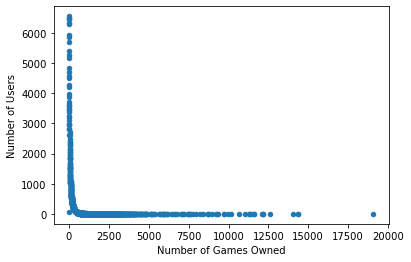

In [11]:
frequency = df['num_games_owned'].value_counts()

data = pd.DataFrame({
    'Number of Games Owned': pd.to_numeric(frequency.index),
    'Number of Users': frequency.values
})
data_s = data.sort_values(['Number of Games Owned'])

data_s.plot( x='Number of Games Owned', y='Number of Users', kind='scatter')

As we can see, most of our data comes from users that own less than 1000 games - which was kind of expected. Let's view this data again using a table to get the actual values:

In [12]:
data_t = data_s.transpose()
data_t

,501,25,1,3,0,2,4,5,6,7,...,1857,1889,1914,1902,1753,1930,2281,1570,2068,1583
Number of Games Owned,0,1,2,3,4,5,6,7,8,9,...,11568,11607,12110,12138,12172,12599,14041,14329,14341,19072
Number of Users,55,3433,6511,6466,6557,6474,6349,6302,5944,5865,...,1,1,1,1,1,1,1,2,1,2


In [21]:
data_50 = data_s.head(50)
sum_val = data_50.sum()
print("Sum of the first 50 data entries:")
print(sum_val)
print()
sum_val = data_t.sum(axis=1)
print("Overall Sum in the dataset:")
print(sum_val)
print()
max_val = data_t.max(axis=1)
print("Overall Maximum in the dataset:")
print(max_val)

Sum of the first 50 data entries:
Number of Games Owned      1225
Number of Users          189030
dtype: int64

Overall Sum in the dataset:
Number of Games Owned    3393759
Number of Users           391332
dtype: int64

Overall Maximum in the dataset:
Number of Games Owned    19072
Number of Users           6557
dtype: int64


From this quick analysis, we see that highest number of games owned is 19 072 and the lowest is 0. Also note that most reviews came from people that owned 1 to 5 games (at least 6000 users each), with the highest being 4 Steam games. And as we see from the tables and calculations above, those owning 50 or less games account for almost half of all the reviews in our data.

One interesting point to note is that there are 55 game reviews that came from reviewers that don't own any Steam games, which brings us to wonder: did they obtain the game from a different source other than Steam or did they review the game without even playing it yet?

#### Looking a Little Deeper (Correlation between Number of Users and Playtime)
Much like the amount of gaming experience, the amount of playtime is also an important contributing factor. Some may leave a review after 5-10 minutes of playing and others might review after a week of playing. This will effect the content of the review as those that have a short playtime may leave biased or inaccurate reviews as it's mostly based on first impressions of the game. Meanwhile, those that have a longer playtime not only review based on first impressions, but they also have some experience to comment on other aspects as well.

<AxesSubplot:xlabel='Play Time in Minutes', ylabel='Number of Users'>

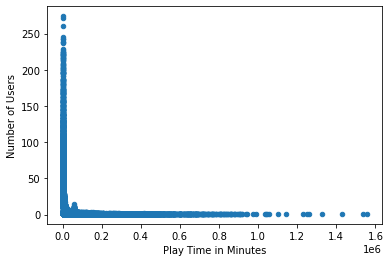

In [14]:
playtime = df['playtime_at_review'].value_counts()

data_p = pd.DataFrame({
    'Play Time in Minutes': pd.to_numeric(playtime.index),
    'Number of Users': playtime.values
})
data_ps = data_p.sort_values(['Play Time in Minutes'])

data_ps.plot( x='Play Time in Minutes', y='Number of Users', kind='scatter')

Once again, let's use a table to see the actual values of this data:

In [15]:
data_ptrans = data_ps.transpose()
data_ptrans

,33588,10924,40782,14980,53998,12182,48940,13470,118,19810,...,36081,38620,50211,34166,39984,55688,36892,59304,61067,31921
Play Time in Minutes,1.0,1.0,2.0,2.0,3.0,3.0,4.0,4.0,5.0,5.0,...,1053350.0,1102577.0,1144066.0,1229270.0,1249496.0,1257989.0,1328794.0,1426669.0,1536702.0,1556556.0
Number of Users,1.0,6.0,1.0,4.0,1.0,5.0,1.0,5.0,157.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
data_p50 = data_ps.head(50)
sum_val = data_p50.sum()
print("Sum of the first 50 data entries:")
print(sum_val)
print()
sum_val = data_ptrans.sum(axis=1)
print("Overall Sum in the dataset:")
print(sum_val)
print()
max_val = data_ptrans.max(axis=1)
print("Overall Maximum in the dataset:")
print(max_val)
print()
data_ps.loc[data_ps['Number of Users'] == 274.0]

Sum of the first 50 data entries:
Play Time in Minutes     670.0
Number of Users         2978.0
dtype: float64

Overall Sum in the dataset:
Play Time in Minutes    3.802863e+09
Number of Users         3.912560e+05
dtype: float64

Overall Maximum in the dataset:
Play Time in Minutes    1556556.0
Number of Users             274.0
dtype: float64



,Play Time in Minutes,Number of Users
0,181.0,274


What I found very interesting to see in this analysis was there were, in fact, some people that wrote a review after less than 5 minutes of playing! Luckily, the reviews with less than an hour of playtime account for a very small percentage of all the reviews in our dataset. 

From our calculations above, we see that our highest number of reviews come from users that played for 181 minutes (or roughly 3 hours), which I think is an appropriate amount of playtime to write an accurate or "more valid" review that I would take into consideration when I decided whether to buy a game or not. 

In [17]:
data_ps120 = data_ps.head(221)
data_pstrans120 = data_ps120.transpose()
data_pstrans120

,33588,10924,40782,14980,53998,12182,48940,13470,118,19810,...,22569,714,59971,730,25794,824,30536,571,35573,616
Play Time in Minutes,1.0,1.0,2.0,2.0,3.0,3.0,4.0,4.0,5.0,5.0,...,116.0,116.0,117.0,117.0,118.0,118.0,119.0,119.0,120.0,120.0
Number of Users,1.0,6.0,1.0,4.0,1.0,5.0,1.0,5.0,157.0,3.0,...,2.0,80.0,1.0,79.0,2.0,74.0,2.0,91.0,1.0,88.0


In [18]:
sum_val = data_pstrans120.sum(axis=1)
print("Sum of data with less than 2hrs of playtime:")
print(sum_val)

Sum of data with less than 2hrs of playtime:
Play Time in Minutes    13264.0
Number of Users         11559.0
dtype: float64


I personally believe that game reviews with less than an hour of playtime are not very accurate reviews, so it was good to see that those reviews contributed to less than 3% of our data. 

##### Conclusion
This data will help us have a better understanding of our research results as it allows us to somewhat "predict" what the content of the reviews will like: short playtime might result in short reviews due to lack of in-game experience or more overall gaming experience may result in more longer, critical reviews as they have more games they can compare it to. Although this "prediction" may not be accurate, this data is interesting to see the correlation between review content and gaming experience/playtime. 

## Task 05: Conducting an Analysis

An interesting question that arose while conducting our exploratory dataset analysis was whether a reviewer's word choice would garner feedback from other reviewers. Such that, were there specific words that would target or trigger a certain response? Did a negative review get more comments than a positive one?

To do this, we compared the review words to the number of review comments. As we have a large dataset, we focused on analyzing the reviews with more than 50 feedback responses. Below is a plot showing the review words that had most comments:

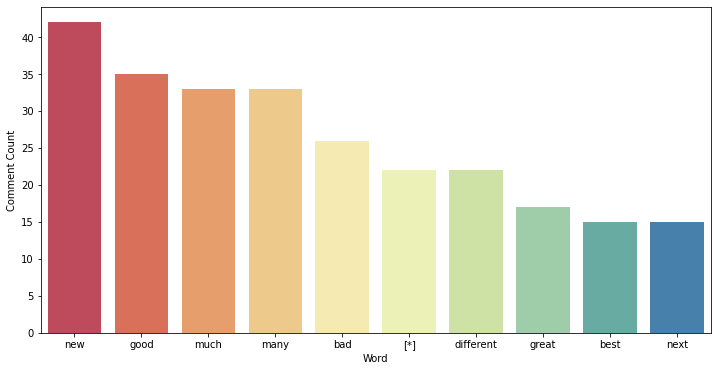

In [27]:
#Limiting data to only contain Review and Comment Count columns
rev_comments = df[['review', 'comment_count']]
data = pd.DataFrame({
    'Review': rev_comments['review'].astype(str),
    'Comment Count': pd.to_numeric(rev_comments['comment_count'])
})

#Keeping only the reviews with more than 50 comments
over50 = data[data['Comment Count'] > 50]

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag, pos_tag_sents

a = Counter(" ".join(over50["Review"].str.lower()).split()).most_common()
stop_words = set(stopwords.words('english'))

#Filtering out meaningless words using NLTK's stop_words list
b = [(i[0],i[1]) for i in a if i[0] not in stop_words]

#Creating dataframe containing words and their counts
word_counts = pd.DataFrame(b, columns=['Word','Count'])

#Further filtering to only contain adjectives
word_counts['POSTags'] = pos_tag_sents(word_counts['Word'].apply(word_tokenize).tolist())
word_counts['POSTags'] = word_counts['POSTags'].astype(str)
final = word_counts[word_counts['POSTags'].str.contains("JJ")].head(10)

plt.figure(figsize=(12,6))
plot = sns.barplot(x=final['Word'], y=final['Count'], palette="Spectral")
plot.set(xlabel='Word', ylabel='Comment Count')
plt.show()

As we can see, mostly positive word choices would gain more comments. This is interesting to see as one may thing that negative reviews would gain **more** comments due to backlash from other users since we are analyzing the top games in each genre. But perhaps because these are top games, the ratio between positive and negative reviews is heavily unbalanced, thus the negative comments may get buried among all the positive reviews. 

Something else that we may need to take into consideration was that this analysis was based solely on individual words, which may skew the results of what we are aiming to know: the effect of the *positivity* or *negativity* of the review on comment count. 

What this means is that our analysis didn't take into the consideration of oxymorons like *amazingly awful, terribly good, etc.* in the reviews, which could affect the answer to our research question as now the meaning of the review has changed. Based on one of our exploratory data analyses, many of the reviews contained less than 10 characters, indicating most reviews would be straightfoward and concise. Thus, it is safe to assume that not many reviews would contain figures of speech like oxymorons.

However, it would still be good to compare it to the reviews' overall affinity score.

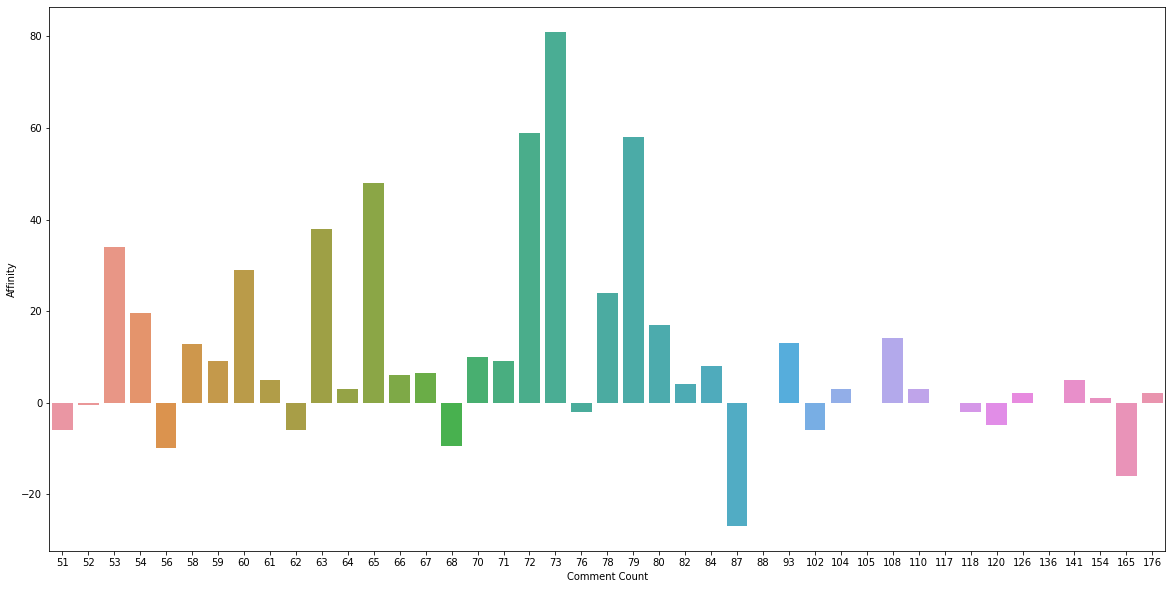

In [28]:
from afinn import Afinn
afinn = Afinn(language='en')

a_over50 = over50.copy()
a_over50['Affinity'] = a_over50['Review'].apply(afinn.score)

plt.figure(figsize=(20,10))
aplot = sns.barplot(x=a_over50['Comment Count'], y=a_over50['Affinity'], ci=None)
plt.show()

This graph shows the distribution of all the reviews with more than 50 comments and its affinity score. The affinity score is calculated based on the average of the review's words sentiment score - negative words have a negative score, positive words have a positive score, and neutral words have a score of zero.

Once again, we see that most reviews have a positive affinity score and make up for a large majority of comment counts. In addition, notice that the review with the second highest number of comments has an affinity score of approximately -15.0. This shows that our hypothesis (that negative reviews garner attention) is *somewhat* correct. 

What is even more interesting is that reviews with more than 100 comments, generally have a low (but positive) affinity score, with the highest score being approximately 10.0. Suprisingly, the highest number of comments has the second **lowest** positive affinity score, which is interesting to see as this means the review was positive but relatively neutral. This brings us to wonder, why did this review received so much user feedback?

In [29]:
top_review = over50[over50['Comment Count'] == 176]
with pd.option_context('display.max_colwidth', None, 'display.colheader_justify','left'):
    display(top_review.style.hide_index()
            .hide_columns(['Comment Count'])
            .set_properties(**{'text-align': 'left'})
            .set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])]))

Review
"This game saved my life. I am 27. My ex-wife and I have a daughter together, and adopted our son together. They are now both 4 years old. When we were going through our separation, I found myself lost and miserable. I was self destructive. I got so mad one day from everything spiraling out of my control that I punched some concrete in a moment of overwhelming emotion. That caused me to break my 5th metacarpal in my right hand... my working hand... my games hand.. the hand that I held and carried my children to bed with.. The hand I desperately needed to make sure I could continue to provide. After learning of the severity of my self-inflicted damage, I was borderline suicidal. Keep in mind that just a few months before this, I was the happiest man with no history of depression or anxiety. I have never had fits of rage, or been one to break down and cry, but I was in a low spot that just really buried me from being able to see the light on the other side. Having nothing better to do, I searched for a game I could play, ONE HANDED while I recovered. I somehow stumbled upon this game and read some of the reviews. I decided that it had to be worth a shot... I must admit, I didn't beat the game, or play nearly as long as some of you. In fact, I may have only played this game a day or two.. With that being said, after doing so, I had a new found joy and hope for life. I was able to put behind me the pain and suffering that had been cast over me. I was able to experience other peoples joy and happiness. I was able to see the fruits of my ""labor"". I relaxed for 5 fucking minutes to this music long enough to realize that I was going to be okay. After coming to that realization, I turned the game off, and I went back to work. It hurt my hand like hell but I was motivated. I stopped feeling so damn sorry for myself, and I became the father I needed to be in that moment, not the weak boy I was behaving as. Today, I am close friend with my kids mother. We don't fight, or argue, or say hurtful things to each other. We are parents, and friends. I now have 3 kids. My third child is, wait for it, ALSO 4 YEARS OLD. The woman I am with was going through a very similar situation at the time of my own separation, and we just stumbled in to each others life unexpectedly. We have been in a relationship for a year now, and are very happy together. Moral of the story, you never know what life holds in store for you, and if I would have given up when all the odds were stacked against me, I wouldn't be where I am today. This silly little game helped me realize that. Thank you ~EDIT~ A lot of people were upset I didn't share the things I enjoyed about the game in detail. Below you will find my personal experience in the short amount of time I spent playing. I spent most of my time fighting slimes with a sword and mining the ore in the dungeon.. haha, but I also made some money off plants. I didn't spend much time getting to know the townsfolk. I got irritated that weeds kept growing in my garden, but I kept plucking them and it was sort of rewarding to keep my map weed free. That's about all I can say other than digging up treasures that would show up in the dirt. I had just planted some plant that cost me like 1000 gold, and I built a water irrigation system around that, and my other plants. It was struck by lightning shortly after... lol, my best friend actually played for several hours with me which was unexpected, and since we shared gold he and I kept screwing each other over for fun. I just saw an update that may be fixing that ""issue"" however, and either way I intend to pick up the game again and play it much more in depth when my winter season comes and work slows down. My 20 hours of enjoyment."


What we find out is that the top commented review happens to be a very touching story of a man who was going through a tough experience that found new joy in his life after discovering a game. Unfortunately, we do not have the data containing the comment responses; however, judging from the bottom portion of the review, it seems that most of the comments were words of congratulations, questions, or critiques that the review was not focused on the gaming experience. 

From this, it makes more sense as to why the comment rate was so high and the affinity score was so low - rather than about the game, the reviewer talked mostly about his difficult life situation causing the affinity score to decrease significantly as it contained words such as *destructive, hurtful, etc.* which have very low sentimental scores. 

##### Conclusion
Overall, this analysis between the number of comments and the reviews' word choice and affinity score showed some very interesting results. And from this, we see there is some correlation between the positivity of the review and the amount of other user feedback, such that generally with top rated games, positive reviews garner more attention as others are able to relate to the reviewer, whether that may be from life experience or in-game experience. 